# FROM THOUGHT TO CODE

This notebook is a case study of how to develop code to solve a problem.

<img src="https://github.com/joseph-hellerstein/advanced-controls-lectures/blob/main/Lecture_13_14-Closed-Loop-Systems/Closed-Loop-System.png?raw=true"
     alt="Markdown Monster icon" width=600pt
     style="float: left; margin-right: 10px;" />

We see that to implement a testbed for the above diagram, we need to construct the
signals $D(s)$ and $N(s)$.
We model both as sinusoids, but at different frequences.
$D(s)$ is generally low frequency (since we change the reference infrequently),
and $N(s)$ is general high frequency.

So, we want a way to easily incorporate different sinusoidal signals into the computational
framework.

Beyond this, there are other elements we'll need to build.
For example, the circles with a "+" are adders.
So, we need elements that take 2 or more inputs and output the sum of those inputs.

# Preliminaries

In [1]:
!pip install -q controlSBML

import control
import controlSBML as ctl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy
import tellurium as te

     |████████████████████████████████| 357 kB 7.7 MB/s 
     |████████████████████████████████| 8.7 MB 26.4 MB/s 
     |████████████████████████████████| 154 kB 41.3 MB/s 
     |████████████████████████████████| 438 kB 30.3 MB/s 
     |████████████████████████████████| 6.8 MB 26.2 MB/s 
     |████████████████████████████████| 121 kB 4.6 MB/s 
     |████████████████████████████████| 428 kB 39.5 MB/s 
     |████████████████████████████████| 53 kB 860 kB/s 
     |████████████████████████████████| 342 kB 35.7 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 130 kB 58.3 MB/s 
     |████████████████████████████████| 561 kB 29.1 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 133 kB 43.4 MB/s 
     |████████████████████████████████| 250 kB 39.1 MB/s 
     |████████████████████████████████| 103 kB 50.5 MB/s 
     |████████████████████████████████| 57 kB 4.2 MB/s 
     |██████████████████

In [2]:
TIMES = ctl.makeSimulationTimes(0, 5, 500)

# Helpers

In [3]:
def plotStep(tf, is_plot=True):
    """
    Plots a transfer function step response
    
    Parameters
    ----------
    tf: control.TransferFunction
    """
    result = control.forced_response(tf, T=TIMES, U=1)
    if is_plot:
        plt.plot(result.t, result.outputs)

# TESTS
Gs = control.TransferFunction([2], [1, 3])
plotStep(Gs, is_plot=False)
print("OK!")

OK!


# Create Sine Waves

OK!


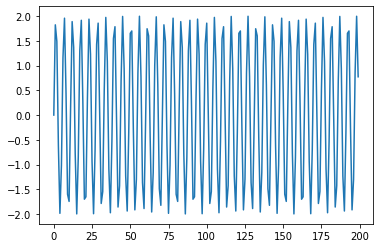

In [4]:
# Requirement: length, amplitude, frequency
def makeSine(times, amplitude, frequency):
    """

    Parameters
    ----------
    times: array-float
    amplitude: float
    frequency: float

    Returns
    -------
    np.ndarry
    """
    return amplitude*np.sin(frequency*times)

# Test
size = 200
times = np.array(range(size))
plt.plot(times, makeSine(times, 2, 20))
sines = makeSine(times, 2, 20)
assert(len(sines) == size)
print("OK!")

# Creating ``NonlinearIOSystem`` objects for Sine Waves

$\dot{ {\bf x}} = {\bf A} {\bf x} + b u$

$y = c x$

OK!


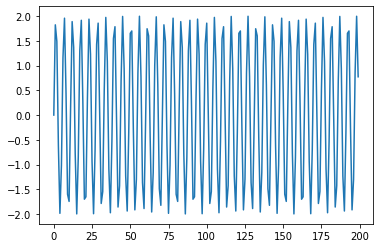

In [5]:
# Examples from predator prey
frequency = 20
amplitude = 2
def outfcn(time, _, __, ___):
    return amplitude*np.sin(frequency*time)

# Tests

size = 200
times = np.array(range(size))
sines = []
for time in times:
    sine = outfcn(time, None, None, None)
    sines.append(sine)
assert(len(sines) == size)
print("OK!")
plt.plot(times, sines)

We need to create ``NonlinearIOSystem`` objects for each element in the testbed.

In [6]:
# NonlinearIOSystem object for a sine wave
frequency = 20
amplitude = 2
def outfcn(time, _, __, ___):
    return amplitude*np.sin(frequency*time)


sinewave = control.NonlinearIOSystem(
    None, outfcn, inputs=[], outputs=["out"],
     name='sinewave')

In [7]:
type(sinewave)

control.iosys.NonlinearIOSystem

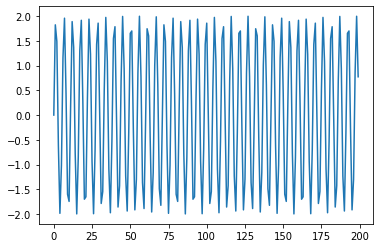

In [8]:
result = control.input_output_response(sinewave, times)
plt.plot(result.t.flatten(), result.y.flatten())

# Factory for ``NonlinearIOSystem`` Sine Wave

# Factory for ``NonlinearIOSystem`` Adder